学生学习的因数和实习满意度的关系

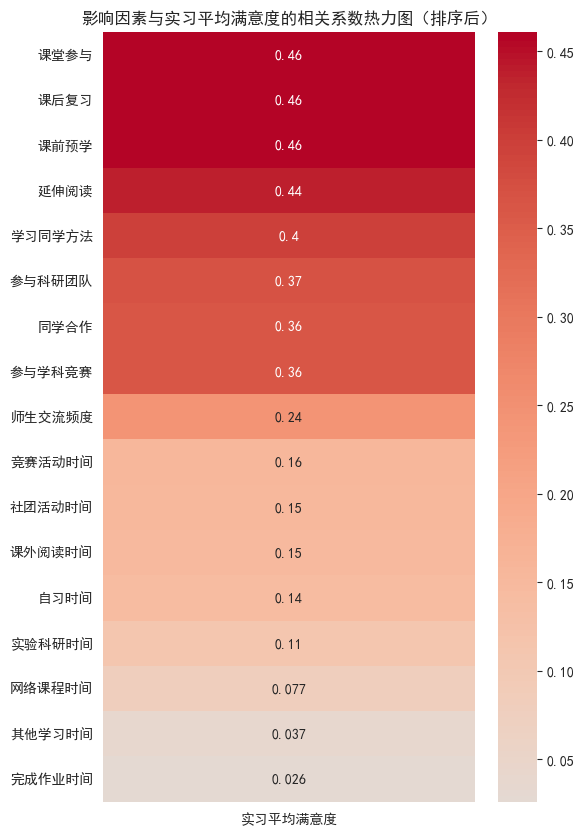

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 设置中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 读取数据
df = pd.read_csv('../../data/intermediate/初步清洗_比赛数据_2.csv', sep=',', engine='python', encoding='utf-8')

# 去除制表符
df = df.map(lambda x: x.strip('\t') if isinstance(x, str) else x)

# 实习
sx_cols = [
    '实习内容满意度',
    '实习时间满意度',
    '实习场地满意度',
    '实习指导满意度',
]

# 计算专业课平均满意度
df['实习平均满意度'] = df[sx_cols].mean(axis=1)

# 影响因素（注意列名与 CSV 一致）
factors = [
    '课前预学',
    '课堂参与',
    '课后复习',
    '延伸阅读',
    '完成作业时间',
    '自习时间',
    '课外阅读时间',
    '网络课程时间',
    '实验科研时间',
    '社团活动时间',
    '竞赛活动时间',
    '其他学习时间',
    '同学合作',
    '参与科研团队',
    '参与学科竞赛',
    '学习同学方法',
    '师生交流频度'
]

# 计算相关系数
corr_data = df[factors + ['实习平均满意度']].corr()

# 取影响因素与专业课平均满意度的相关系数
corr_factors = corr_data[['实习平均满意度']].drop('实习平均满意度')

# 根据相关系数排序
corr_factors_sorted = corr_factors.sort_values(by='实习平均满意度', ascending=False)

# 画热力图
plt.figure(figsize=(6, 10))
sns.heatmap(corr_factors_sorted, annot=True, cmap='coolwarm', center=0)
plt.title('影响因素与实习平均满意度的相关系数热力图（排序后）')
plt.show()
